In [2]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [3]:
def get_neighbors(maze, node):
    """Get valid neighboring cells that can be traversed."""
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    for direction in directions:
        neighbor = (node[0] + direction[0], node[1] + direction[1])
        if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] == 0:
            neighbors.append(neighbor)
    return neighbors

def manhattan_distance(a, b):
    """Calculate Manhattan distance between two points a and b."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [4]:
def dfs(maze, start, goal):
    """Depth-First Search (DFS) algorithm."""
    stack = [(start, [start])]
    visited = set()
    while stack:
        current, path = stack.pop()
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(maze, current):
            stack.append((neighbor, path + [neighbor]))
    return None

def bfs(maze, start, goal):
    """Breadth-First Search (BFS) algorithm."""
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(maze, current):
            queue.append((neighbor, path + [neighbor]))
    return None

def ucs(maze, start, goal):
    """Uniform Cost Search (UCS) algorithm."""
    queue = [(0, start, [start])]
    visited = set()
    while queue:
        cost, current, path = heapq.heappop(queue)
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(maze, current):
            heapq.heappush(queue, (cost + 1, neighbor, path + [neighbor]))
    return None

def a_star(maze, start, goal):
    """A* Search algorithm."""
    queue = [(0, start, [start])]
    visited = set()
    while queue:
        cost, current, path = heapq.heappop(queue)
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(maze, current):
            heapq.heappush(queue, (cost + manhattan_distance(neighbor, goal), neighbor, path + [neighbor]))
    return None

def best_first_search(maze, start, goal):
    """Best-First Search algorithm."""
    queue = [(manhattan_distance(start, goal), start, [start])]
    visited = set()
    while queue:
        _, current, path = heapq.heappop(queue)
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(maze, current):
            heapq.heappush(queue, (manhattan_distance(neighbor, goal), neighbor, path + [neighbor]))
    return None


In [5]:
def get_maze_input():
    """creating a simple maze"""
    return [
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
    ]

def get_start_goal_positions(maze):
    """Get start and goal positions. Ensure they are valid."""
    start = (0, 0)
    goal = (9, 9)
    
    if maze[start[0]][start[1]] != 0 or maze[goal[0]][goal[1]] != 0:
        raise ValueError("Invalid start or goal position. They must be on open paths (0).")
    
    return start, goal

def visualize_maze(maze, path=None):
    """Visualize the maze and the path found by the algorithm."""
    maze_array = np.array(maze)
    
    # Convert the maze to an RGB image
    image = np.zeros((maze_array.shape[0], maze_array.shape[1], 3), dtype=np.uint8)
    image[maze_array == 1] = [0, 0, 0]  # Black walls
    image[maze_array == 0] = [255, 255, 255]  # White paths
    
    if path:
        for position in path:
            image[position[0], position[1]] = [255, 0, 0]  # Red path
        
        image[path[0]] = [0, 255, 0]  # Green start
        image[path[-1]] = [0, 0, 255]  # Blue goal
    
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()

In [6]:
def solve_maze(algorithm):
    """Solve the maze using the selected algorithm and visualize the result."""
    maze = get_maze_input()
    start, goal = get_start_goal_positions(maze)
    
    path = algorithm(maze, start, goal)
    if path:
        print(f"Path found with {algorithm.__name__}!")
        visualize_maze(maze, path)
    else:
        print(f"No path found with {algorithm.__name__}.")

Dropdown(description='Algorithm:', options=('DFS', 'BFS', 'UCS', 'A*', 'Best-First Search'), value='DFS')

Button(description='Solve Maze', style=ButtonStyle())

Path found with dfs!


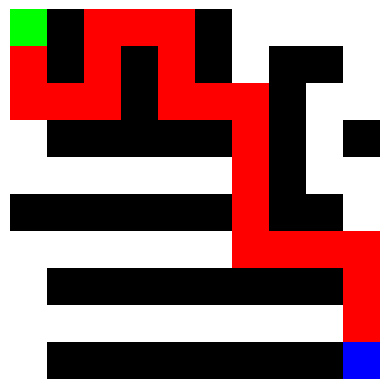

Path found with bfs!


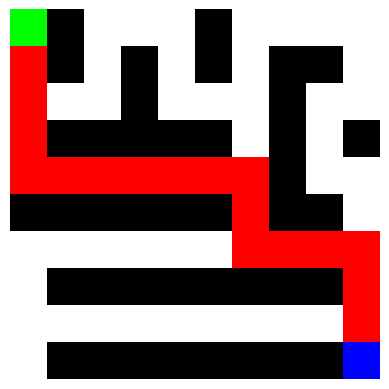

Path found with ucs!


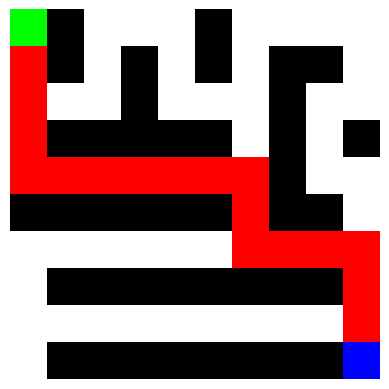

Path found with a_star!


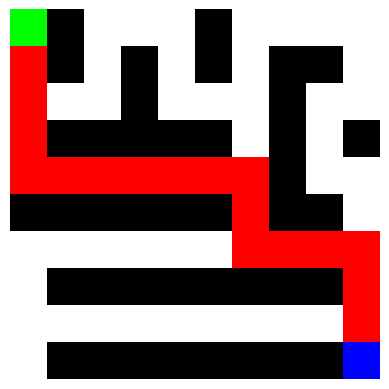

Path found with best_first_search!


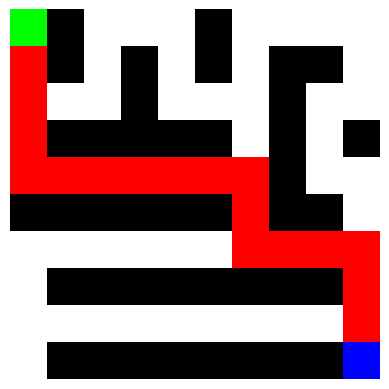

In [ ]:
def main():
    algorithms = {
        'DFS': dfs,
        'BFS': bfs,
        'UCS': ucs,
        'A*': a_star,
        'Best-First Search': best_first_search
    }
    
    dropdown = widgets.Dropdown(
        options=list(algorithms.keys()),
        description='Algorithm:',
    )
    
    button = widgets.Button(description="Solve Maze")
    
    def on_button_clicked(b):
        solve_maze(algorithms[dropdown.value])
    
    button.on_click(on_button_clicked)
    
    display(dropdown, button)

if __name__ == "__main__":
    main()
